# Data Analyst Project 2 : Wrangling And Analyze

### Gathering 

In [639]:
import pandas as pd 

#### Twitter Archive Enhanced File 

In [536]:
#reading the WeRateDogs Twitter Enhanced Archive file
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')


### Tweet Image Prediction File 

In [159]:
import requests
import os

In [4]:
#url to download the tweet image prediction file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
#downloading the image-prediction.tsv file
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
          file.write(response.content)
          

In [537]:
#reading the image-prediction.tsv file
image_predict = pd.read_csv('image-predictions.tsv', sep = '\t')


#### Data From Twitter API

In [22]:
import tweepy 
from tweepy import OAuthHandler
import json

# Query Twitter API for each tweet in the Twitter archive and save JSON
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#save json file
tweet_ids = df_1.tweet_id.values

with open('tweet.json', 'w') as file:
    tweet = api.get_status(tweet_ids, tweet_mode='extended')
    json.dump(tweet._json, file)
    file.write()



In [19]:
#reading the json file
import json

#load data using Python JSON module and converting to .txt file
with open('tweet.json','r') as file:
    #iterating through the json file 
    for line in file:
        data = json.loads(line)
        txt_df = {'tweet ID':[data['id']], 
                  'retweet count': [data['retweet_count']], 
                  'favorite count': [data['favorite_count']]}
        #loading into a Dataframe 
        df = pd.DataFrame(txt_df)
        #saving tweet.json file as .txt file
        #df.to_csv('tweet_json.txt', index=None, header=None, sep=' ', mode = 'a')
        


In [538]:
#reading the tweet_json.txt file
tweet_json = pd.read_csv('tweet_json.txt', sep= ' ', header=None)
tweet_json


,0,1,2
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Assessing

In [539]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [540]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [541]:
twitter_arch[['tweet_id','in_reply_to_status_id','in_reply_to_user_id']].dtypes 


tweet_id                   int64
in_reply_to_status_id    float64
in_reply_to_user_id      float64
dtype: object

In [542]:
twitter_arch['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [543]:
twitter_arch.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

##### Quality
- Non-name words in name column, words like; a,quite, such ...
- Retweeted text are included in text column
- tweet_id is an integer
- Missing records in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, 

##### Tidiness
- Unclear if name column is pet name or breed name.
- Dog stages are spread across 4 columns (doggo,floofer,pupper,puppo)

In [544]:
image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [545]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


##### Quality 
- p1_conf,p2_conf and p3_conf are in mean mode not percentage mode
- tweet_id are integers 

##### Tidiness 
- unclear column names
-  '_' in some p1,p2,p3 values
- some breed names starts with lowercase and others uppercase
- 

In [546]:
tweet_json

,0,1,2
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [547]:
tweet_json.describe()

,0,1,2
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [548]:
tweet_json[0].dtype

dtype('int64')

##### Quality 
- 0 column values are integers 

##### Tidiness
- Numbers as column headers 


## Cleaning 

#### Twitter Archive Enhanced File


In [711]:
#making copy of twitter_arch file 
twitter_archive = twitter_arch.copy()


In [712]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


##### Define : Replace non-name words with ' '

##### Code

In [713]:
#using ' ' as replacement 
twitter_archive = twitter_archive.replace(['a','None','quite','such','the','an',
                                          'all','this','not','one','mad','his',
                                          'getting','old','by','life','light'], ' ')


##### Test

In [714]:
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', ' ', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

##### Define : Dropping NaN values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

##### Code

In [715]:
twitter_archive = twitter_archive[twitter_archive['retweeted_status_id'].isnull()]
twitter_archive = twitter_archive[twitter_archive['retweeted_status_user_id'].isnull()]
twitter_archive = twitter_archive[twitter_archive['retweeted_status_timestamp'].isnull()]



##### Test 

In [716]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.175000e+03,7.800000e+01,7.800000e+01,0.0,0.0,2175.000000,2175.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,NaN,NaN,13.215172,10.492874
std,6.748668e+16,7.582492e+16,1.252797e+17,NaN,NaN,47.725696,7.019084
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,0.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.894226e+17,8.257804e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000


##### Define : Drop Unnecessary Columns

##### Code

In [717]:
twitter_archive.drop(columns = ['in_reply_to_status_id',
                                'in_reply_to_user_id',
                                'retweeted_status_id',
                                'retweeted_status_user_id',
                                'retweeted_status_timestamp',
                                'expanded_urls'],
                                inplace =True)
                                
                                

##### Test

In [718]:
twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

##### Define : Convert tweet_id to string

##### Code 

In [719]:
twitter_archive = twitter_archive.astype({'tweet_id' : str}, errors = 'raise')


##### Testing 

In [720]:
twitter_archive.tweet_id.dtypes 

dtype('O')

##### Define : Renaming name column to pet_name

##### Code 

In [721]:
##renaming name column in twitter_arch 
twitter_archive.rename(columns={'name':'pet_name'}, inplace =True)


##### Test

In [722]:
twitter_archive.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,pet_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,


##### Define : Add All Dog Stages Into One Column 

##### Code 

In [723]:
twitter_archive['stage'] = twitter_archive['doggo'] + twitter_archive['floofer'] + twitter_archive['pupper'] + twitter_archive['puppo']


##### Test 

In [725]:
twitter_archive.stage.unique()

array(['    ', 'doggo   ', '   puppo', '  pupper ', ' floofer  ',
       'doggo  puppo', 'doggofloofer  ', 'doggo pupper '], dtype=object)

##### Define : Drop floofer, puppo, doggo, pupper columns 

##### Code 

In [726]:
twitter_archive.drop(columns = ['doggo', 'floofer', 'puppo','pupper'], inplace=True)


##### Test 

In [727]:
twitter_archive.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,pet_name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,


##### Define : Replace 'doggo pupper','doggo puppo', 'doggofloofer with comma seperated values. 

##### Code 

In [728]:
twitter_archive.loc[twitter_archive.stage == 'doggo pupper '] = 'doggo,pupper' 
twitter_archive.loc[twitter_archive.stage == 'doggo  puppo'] = 'doggo,puppo' 
twitter_archive.loc[twitter_archive.stage == 'doggofloofer  '] = 'doggo,floofer'


##### Test 

In [729]:
twitter_archive.stage.unique()

array(['    ', 'doggo   ', '   puppo', '  pupper ', ' floofer  ',
       'doggo,puppo', 'doggo,floofer', 'doggo,pupper'], dtype=object)

In [730]:
twitter_archive

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,pet_name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,
...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,,
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,,
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,,
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,,


### Twitter Image Prediction 

In [731]:
#making copy of the image_predict
image_prediction = image_predict.copy()


In [732]:
image_prediction.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


##### Define : Renaming Unclear Column names 

##### Code 

In [733]:
##renaming unclear column names in image_prediction
image_prediction.rename(columns={'jpg_url':'image_url','img_num':'image_number','p1': 'first_prediction','p1_conf':'first_prediction_confidence(%)',
                                 'p1_dog':'first_prediction_is_dog','p2': 'second_prediction','p2_conf':'second_prediction_confidence(%)','p2_dog':'second_prediction_is_dog',
                                 'p3': 'third_prediction','p3_conf':'third_prediction_confidence(%)','p3_dog':'third_prediction_is_dog'},inplace=True)       


##### Test

In [734]:
image_prediction.columns

Index(['tweet_id', 'image_url', 'image_number', 'first_prediction',
       'first_prediction_confidence(%)', 'first_prediction_is_dog',
       'second_prediction', 'second_prediction_confidence(%)',
       'second_prediction_is_dog', 'third_prediction',
       'third_prediction_confidence(%)', 'third_prediction_is_dog'],
      dtype='object')

##### Define : Removing '_' From Values 

##### Code 

In [735]:
##Removing '_' in image prediction 

#set_index as tweet_id
image_prediction.set_index('tweet_id',inplace =True)
#using pandas replace function
image_prediction.replace('_',' ', inplace=True, regex=True)


In [736]:
#reset index to default 
image_prediction.reset_index(inplace =True)


##### Test 

In [737]:
image_prediction['first_prediction'].head()

0    Welsh springer spaniel
1                   redbone
2           German shepherd
3       Rhodesian ridgeback
4        miniature pinscher
Name: first_prediction, dtype: object

##### Define : Capitalizing Breed Names 

##### Code 

In [738]:
##capitalizing the first letter of all values in first,second and third predictions 
def capitalize(column):
    """created the function capitalize() 
    to pass in one parameter column in it.
    
    column : is a parameter used for passing 
    in the object columns that it's values needs 
    to be capitalize using the Series.str.title() 
    function.
    
    The function returns the entire dataframe"""
    
    image_prediction[column] = image_prediction[column].str.title()
    #return image_prediction
    
capitalize('first_prediction')
capitalize('second_prediction')
capitalize('third_prediction')   
    

##### Test 

In [739]:
image_prediction['first_prediction'].head()

0    Welsh Springer Spaniel
1                   Redbone
2           German Shepherd
3       Rhodesian Ridgeback
4        Miniature Pinscher
Name: first_prediction, dtype: object

##### Define : Convert mean values of prediction Confidence to percentage 

##### Code 

In [740]:
##convert first,second and third prediction confidence to percentage 
def percentage(column):
    """created the function percentage() 
    to pass in one parameter column in it.
    
    column : is a parameter used for passing
    in the float columns that it's values needs 
    to be converted to percentage format.
    
    The function returns the entire dataframe"""
    
    image_prediction[column] = (image_prediction[column] * 100.).round(1)
    #return image_prediction 

percentage('first_prediction_confidence(%)')
percentage('second_prediction_confidence(%)')
percentage('third_prediction_confidence(%)')


##### Test 

In [741]:
image_prediction['first_prediction_confidence(%)'].head()


0    46.5
1    50.7
2    59.6
3    40.8
4    56.0
Name: first_prediction_confidence(%), dtype: float64

##### Define : Convert tweet_id to string 

##### Code 

In [742]:
image_prediction = image_prediction.astype({'tweet_id' : str}, errors = 'raise')


##### Test 

In [743]:
image_prediction.tweet_id.dtypes

dtype('O')

### Tweet_json File 

In [744]:
#making copy of tweet_json file
twitter_json = tweet_json.copy()

In [745]:
twitter_json.head(1)

,0,1,2
0,892420643555336193,8853,39467


##### Define : Renaming Column Headers 

##### Code 

In [746]:
##renaming column header in tweeter_json file
twitter_json.rename(columns={0:'tweet_id',1:'retweet_count',2:'favorite_count'}, inplace = True)


##### Test

In [747]:
twitter_json.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


##### Define : Converting tweet_id to string 

##### Code 

In [748]:
twitter_json = twitter_json.astype({'tweet_id' : str}, errors = 'raise')


##### Test

In [749]:
twitter_json.tweet_id.dtypes

dtype('O')

### Merge All Three Dataframes To A Master Dataframe

In [752]:
df = pd.merge(twitter_archive, twitter_json)
twitter_archive_master = pd.merge(df, image_prediction)
twitter_archive_master


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,pet_name,stage,retweet_count,favorite_count,...,image_number,first_prediction,first_prediction_confidence(%),first_prediction_is_dog,second_prediction,second_prediction_confidence(%),second_prediction_is_dog,third_prediction,third_prediction_confidence(%),third_prediction_is_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,8853,39467,...,1,Orange,9.7,False,Bagel,8.6,False,Banana,7.6,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,6514,33819,...,1,Chihuahua,32.4,True,Pekinese,9.1,True,Papillon,6.9,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,4328,25461,...,1,Chihuahua,71.6,True,Malamute,7.8,True,Kelpie,3.1,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,8964,42908,...,1,Paper Towel,17.0,False,Labrador Retriever,16.8,True,Spatula,4.1,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,9774,41048,...,2,Basset,55.6,True,English Springer,22.6,True,German Short-Haired Pointer,17.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,,,41,111,...,1,Miniature Pinscher,56.0,True,Rottweiler,24.4,True,Doberman,15.5,True
1979,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,,,147,311,...,1,Rhodesian Ridgeback,40.8,True,Redbone,36.1,True,Miniature Pinscher,22.3,True
1980,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,,,47,128,...,1,German Shepherd,59.6,True,Malinois,13.9,True,Bloodhound,11.6,True
1981,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,,,48,132,...,1,Redbone,50.7,True,Miniature Pinscher,7.4,True,Rhodesian Ridgeback,7.2,True


### Storing Data

In [753]:
twitter_archive_master.to_csv('twitter_archive_master.csv')


### Analyzing And Visualizing Data 

#### Analyzing Data 
- What is the most favourited tweet 
- What are the most famous dog breeds
- What are the most used pet names

In [754]:
#making a copy of the master dataframe
clean_file = twitter_archive_master.copy()
clean_file.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,pet_name,stage,retweet_count,favorite_count,...,image_number,first_prediction,first_prediction_confidence(%),first_prediction_is_dog,second_prediction,second_prediction_confidence(%),second_prediction_is_dog,third_prediction,third_prediction_confidence(%),third_prediction_is_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,8853,39467,...,1,Orange,9.7,False,Bagel,8.6,False,Banana,7.6,False


##### Define : What Is The Most Favourited Tweet 

##### Code 

In [755]:
#sort values in favorite_count in desenďing order
most_favorited = clean_file.sort_values('favorite_count', ascending = False)


##### Test 

In [770]:
most_favorited.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,pet_name,stage,retweet_count,favorite_count,...,image_number,first_prediction,first_prediction_confidence(%),first_prediction_is_dog,second_prediction,second_prediction_confidence(%),second_prediction_is_dog,third_prediction,third_prediction_confidence(%),third_prediction_is_dog
307,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,,puppo,48265,132810,...,1,Lakeland Terrier,19.6,True,Labrador Retriever,16.0,True,Irish Terrier,6.9,True
766,744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,,doggo,79515,131075,...,1,Labrador Retriever,82.5,True,Ice Bear,4.5,False,Whippet,1.8,True
58,879415818425184262,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,,45849,107956,...,1,English Springer,38.3,True,Boston Bull,13.5,True,Cardigan,11.0,True


In [758]:
most_favorited.text[307]

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

##### ANALYSIS 
Tweet id : 822872901745569793 is the most favourited tweet with favourite count of 132,810 and the likelihood why it is the most favourited could be because of the inclusion of the hashtag #WomensMarch which extended it's audience to Twitter users outside the WeRateDogs profile. 

##### Define : The Most Famous Dog Breeds 

##### Code 

In [759]:
#count unique values in the first predictions 
most_famous_1st = clean_file['first_prediction'].value_counts()


In [760]:
#count unique values in the second prediction 
most_famous_2nd = clean_file['second_prediction'].value_counts()


In [761]:
#count unique values in the third prediction 
most_famous_3rd = clean_file['third_prediction'].value_counts()


##### Test

In [762]:
most_famous_1st

Golden Retriever      135
Labrador Retriever     94
Pembroke               88
Chihuahua              79
Pug                    54
                     ... 
Cowboy Boot             1
Timber Wolf             1
Hare                    1
Gas Pump                1
Agama                   1
Name: first_prediction, Length: 374, dtype: int64

In [763]:
most_famous_2nd

Labrador Retriever          91
Golden Retriever            82
Cardigan                    73
Chihuahua                   43
Chesapeake Bay Retriever    40
                            ..
Folding Chair                1
Horse Cart                   1
Medicine Chest               1
Desk                         1
Rifle                        1
Name: second_prediction, Length: 399, dtype: int64

In [764]:
most_famous_3rd

Labrador Retriever    76
Chihuahua             57
Golden Retriever      46
Eskimo Dog            36
Kelpie                32
                      ..
Cowboy Boot            1
Shovel                 1
Bullfrog               1
Barrow                 1
Red Wolf               1
Name: third_prediction, Length: 405, dtype: int64

##### ANALYSIS 
From the above data, the Golden Retriever tops both the first and third predictions of the most famous dog breeds, and is second in the second prediction list of most famous dog breed. 
So if you sum their numbers up from all three list, the Golden Retriever is the overall most famous dog breed from our analysis.

##### Define : The Most Used Pet Name 

##### Code 

In [766]:
most_used = clean_file['pet_name'].value_counts()

##### Test

In [767]:
most_used.head()

           624
Charlie     11
Lucy        10
Cooper      10
Oliver      10
Name: pet_name, dtype: int64

##### ANALYSIS 
From the analysis, Charlie is the most used pet name given to a dog.

#### Visualizing Data 

Visualizing for the top 3 of the most favourited tweets. 

In [768]:
import matplotlib.pyplot as plt
%matplotlib inline

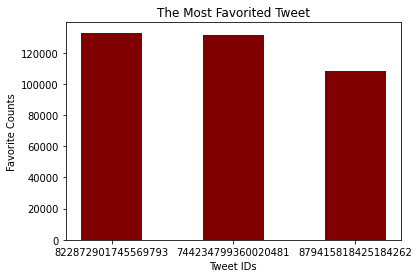

In [769]:
#creating the bar plot for the most favourited tweet 
plt.bar(most_favorited['tweet_id'][0:3], most_favorited['favorite_count'][0:3], color ='maroon', width = 0.5)

plt.xlabel("Tweet IDs")
plt.ylabel("Favorite Counts")
plt.title("The Most Favorited Tweet")
plt.show()



##### Conclusion 
The visualization shows that Tweet id : 822872901745569793 is the most favourited tweet.